## Importamos librerias necesarias para iniciar EDA

In [167]:
import pandas as pd
import numpy as np
import warnings
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from IPython.display import display
# Text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


warnings.filterwarnings('ignore')#to filter all the warnings
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short

[nltk_data] Downloading package punkt to /home/kennydev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kennydev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carga del dataset preprocesado

In [168]:
df = pd.read_csv('../data/preprocessed/video_cln.csv')
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['category_name']= df['category_name'].astype('category')

In [169]:
df1 = pd.read_csv('../data/preprocessed/video_cln.csv')
df1['trending_date'] = pd.to_datetime(df1['trending_date'])
df1['publish_time'] = pd.to_datetime(df1['publish_time'])
df1['category_name']= df1['category_name'].astype('category')
df1.drop_duplicates(subset=['video_id'], keep='last', inplace=True)
df1.head(3)

video_id trending_date  category_id        publish_time   views  likes  \
10  9wRQljFNDW8    2017-11-14           17 2017-11-13 02:05:26   81377    655   
36  Om_zGhJLZ5U    2017-11-14            1 2017-11-12 18:00:03  288922   7515   
41  goP4Z5wyOlM    2017-11-14           25 2017-11-12 21:16:40   34785    308   

    dislikes  comment_count     category_name  \
10        25            177            Sports   
36       792           2111  Film & Animation   
41        26            413   News & Politics   

                                                 tags  \
10  nfl football offense defense afc nfc american ...   
36  screenjunkies screen junkies sj news honest tr...   
41  bbc bbc news news iran iran news iraq iraq new...   

                                          video_title   channel_title  \
10  dion lewis 103-yd kick return td vs denver can...             nfl   
36       tl dw every dceu movie before justice league  screen junkies   
41  iraq-iran earthquake deadly tremor hits border...        bbc news   

                                          description  
10  new england patriots returner dion lewis blast...  
36  with justice league approaching fast we rewatc...  
41  a strong 7 2-magnitude earthquake has rattled ...

### Descripcion del dataset preprocesado

* video_id------------------------- ID de cada video `(string)`
* published_time----------------------- Fecha _(año-mes-dia)_ de publicacion del video `(datetime)`
* category_id------------------------ Id de cada categoria por video `(Int)`
* trending_date---------------------- Fecha _(año-mes-dia hora:min:seg)_ en el que el video se hizo viral `(datetime)`
* view_count------------------------- Cantidad de visitas del video `(Int)`
* likes------------------------------ Cantidad del likes del video `(Int)`
* dislikes--------------------------- Cantidad de dislike del video `(Int)`
* comment_count---------------------- Cantidad de comentarios del video `(Int)`
* category_name----------------------- Nombre de la categoria ligada al category_id `(category)`
* description----------------------------- Descripcion por cada video `(string)`
* tags--------------------------------------- Etiquetas sobre el contenido del video `(string)`
* video_title------------------------------ Titulo del video `(string)`
* channel_title-------------------------- Titulo del canal que publico el video `(string)`

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 10 to 40948
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       6351 non-null   object        
 1   trending_date  6351 non-null   datetime64[ns]
 2   category_id    6351 non-null   int64         
 3   publish_time   6351 non-null   datetime64[ns]
 4   views          6351 non-null   int64         
 5   likes          6351 non-null   int64         
 6   dislikes       6351 non-null   int64         
 7   comment_count  6351 non-null   int64         
 8   category_name  6351 non-null   category      
 9   tags           6351 non-null   object        
 10  video_title    6350 non-null   object        
 11  channel_title  6351 non-null   object        
 12  description    6351 non-null   object        
dtypes: category(1), datetime64[ns](2), int64(5), object(5)
memory usage: 651.9+ KB


### 1. ¿Cuáles son las categorías de vídeos que reciben mayores vistas y Likes?

In [171]:
df1[df1['description'].isna()]

Empty DataFrame
Columns: [video_id, trending_date, category_id, publish_time, views, likes, dislikes, comment_count, category_name, tags, video_title, channel_title, description]
Index: []

In [172]:
# ¿Cuantas categorias existen en nuestro dataset?
len(df1['category_name'].unique())

16

In [173]:
df_like_dislikes_cat = df1.drop_duplicates(subset=['video_id'], keep='last')

In [174]:
df_like_dislikes_cat = df_like_dislikes_cat.groupby('category_name')[['likes', 'dislikes', 'views']].sum()
df_like_dislikes_cat.sort_values('views', ascending=False, inplace=True)

In [175]:
fig = px.line(df_like_dislikes_cat, 
              x=df_like_dislikes_cat.index,
              y='views',
              title='Views per category')
fig.show()

<p style='color: green'>Conclusion</p>

* `Music` es la categoria que mas vistas acumula con cerca de 5 billones de visitas
* `Entertainment` es la categoria que se acerca mas a music pero esta cuenta con un total de 2.8B de visitas acumuladas.
* `Film & Animation` obtiene el 3er lugar de esta ranking con mas de 814M de visitas acumuladas en sus videos

In [176]:
df_like_dislikes_cat.sort_values('likes', ascending=False, inplace=True)

In [177]:
plt.rcParams["figure.figsize"] = (12,8)
fig = px.line(df_like_dislikes_cat, 
              x=df_like_dislikes_cat.index,
              y='likes',
              title='Likes per category')
fig.show()

<p style='color: green'>Conclusion</p>

* `Music` es la categoria que mas likes acumula con mas de 150 millones de likes
* `Entertainment` es la categoria que se acerca mas a music pero esta cuenta con mas de 67 millones de likes acumulados.
* `Comedy` obtiene el 3er lugar de esta ranking con mas de 29 millones de likes acumulados en sus videos

### 2. ¿Es posible encontrar agrupaciones o clasificaciones de videos?

In [178]:
df.sample(3)

video_id trending_date  category_id        publish_time   views  \
29308  4Qs8herYTqY    2018-04-17           26 2018-04-04 00:27:14  612089   
2933   G_Pu00NmJfg    2017-11-28           26 2017-11-21 16:04:29  424065   
14954  oGmIFXfgPM4    2018-01-29           28 2018-01-23 23:09:28  739380   

       likes  dislikes  comment_count         category_name  \
29308  35707       305           2988         Howto & Style   
2933   10467       217           1069         Howto & Style   
14954  36625       220            686  Science & Technology   

                                                    tags  \
29308  nyma tang the darkest shade contour for dark s...   
2933   first we feast fwf firstwefeast food food porn...   
14954                                               none   

                                             video_title   channel_title  \
29308  professional makeup artist watching me do my m...       nyma tang   
2933   the ultimate nacho showdown with brad leone an...  first we feast   
14954  jennifer lopez david dobrik fear box challenge...            at t   

                                             description  
29308  hey guys n ncome hang out with me and daniel m...  
2933   when it comes to the culinary arts nachos are ...  
14954  super saturday night with jennifer lopez live ...

In [179]:
df['publish_month'] = df['publish_time'].dt.month_name()
df['publish_year'] = df['publish_time'].dt.year

In [180]:
categories = df['category_name'].unique()
def plot_per_category(categories, df):
    for category in categories:
        df.drop_duplicates(subset=['video_id'], keep='last', inplace = True)
        print(category)
        df1 = df[df['category_name'] == category]
        df1 = df1.groupby('publish_month')[['views', 'likes', 'dislikes']].sum()
        best_month = df1['views'].idxmax()
        print("Best month for plublish {} video is {}".format(category, best_month))
        fig = px.line(df1, x=df1.index, y='views', title=category)
        fig.show()

In [181]:
plot_per_category(categories, df)

People & Blogs
Best month for plublish People & Blogs video is February


Entertainment
Best month for plublish Entertainment video is December


Comedy
Best month for plublish Comedy video is December


Science & Technology
Best month for plublish Science & Technology video is February


Film & Animation
Best month for plublish Film & Animation video is May


News & Politics
Best month for plublish News & Politics video is May


Sports
Best month for plublish Sports video is March


Music
Best month for plublish Music video is May


Pets & Animals
Best month for plublish Pets & Animals video is January


Education
Best month for plublish Education video is March


Howto & Style
Best month for plublish Howto & Style video is December


Autos & Vehicles
Best month for plublish Autos & Vehicles video is February


Travel & Events
Best month for plublish Travel & Events video is February


Gaming
Best month for plublish Gaming video is June


Nonprofits & Activism
Best month for plublish Nonprofits & Activism video is January


Shows
Best month for plublish Shows video is April


De las graficas anteriores, separadas por categorias, encontramos que:
* No existe una formula secreta para conocer la repercusion de la fecha en el video que publiquemos
* Sin embargo, es posible notar como algunas categorias ven potenciadas su numero de visualizaciones dependiendo la epoca del año, por ejemplo:
    * `Diciembre`: Decoracion para el hogar o estilos y nuevas tendencias de moda, igualmente para la industria del entretenimiento
    * `January`: Para todo lo relacionado con pets & animals y Nonprofits & Activism
    *  `February`: El mes donde se concentra la mayor cantidad de views para categorias como:
        * people & blogs
        * autos & vehicles
        * travels & events
        * science & technology

### 3. ¿Cuál es la combinación de características o atributos más importantes que hacen de un video tendencia?

In [182]:
stopwords = set(STOPWORDS)
stopwords.update(['follow', 'twitter', 'social', 'instagram', 'subscribe', 'snapchat', 'youtube', 'videos', 'video'\
                  ,'channel', 'share', 'facebook', 'comment', 'like', 'take', 'go', 'got', 'back',\
                  'much', 'made', 'keep', 'watch','none', 'check', 'will', 'make', 'https',\
                  'nfollow', 'ntwitter', 'nsocial', 'ninstagram', 'nhttp', 'nfacebook',\
                  'n', 'nhttps', 'tumblr', 'e', 'youtube', 'netflix', 'bit', 'ly',\
                  'nwatch', 'goo', 'gl', 'amzn', 'nnbc', 'nbc', 'youtu', 'nlike',\
                  'google', 'plus', 'nclick', 'nbctv', 'c', 's', 'nsubscribe', 'iphone',\
                  'pl7u4lwxq3wfi_7pgx0c-vtiwleu0s4v34', '2018', 'nlearn'])

def generate_wordcloud(text, stop_words):
    wordcloud = WordCloud(stopwords=stop_words,max_font_size=50, max_words=150, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en People & Blogs para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'People & Blogs'

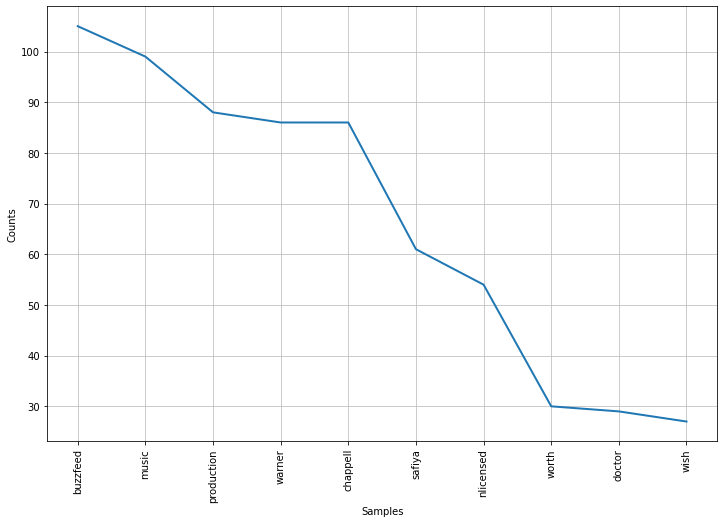

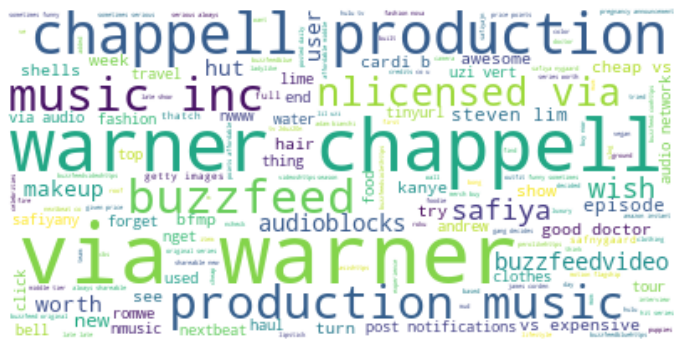


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Entertainment para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Entertainment'

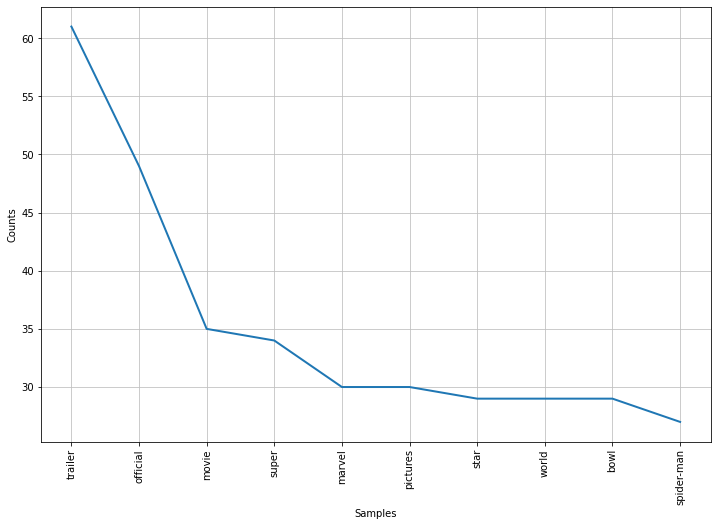

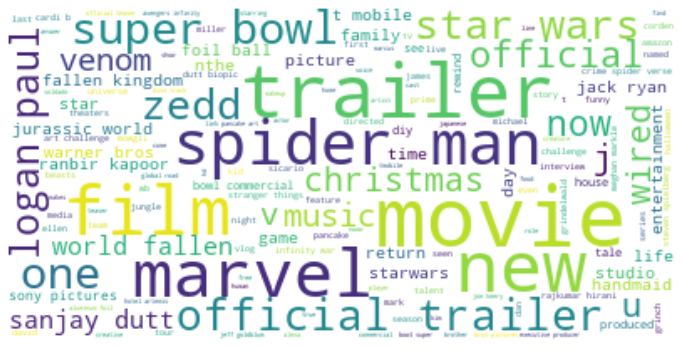


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Comedy para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Comedy'

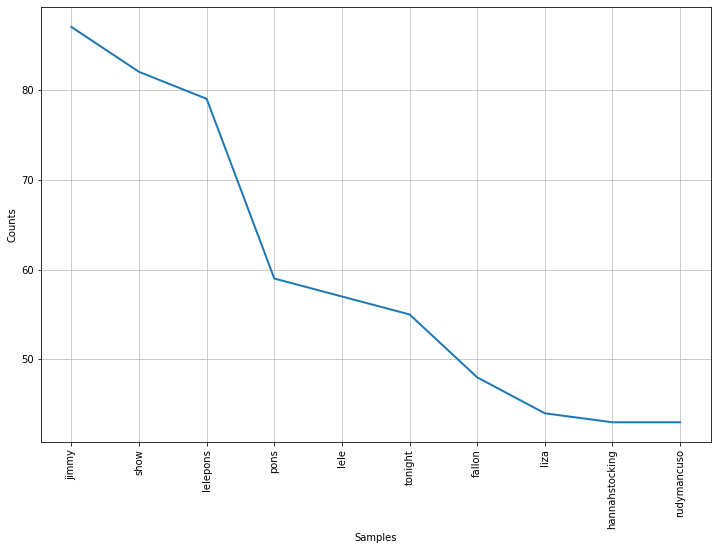

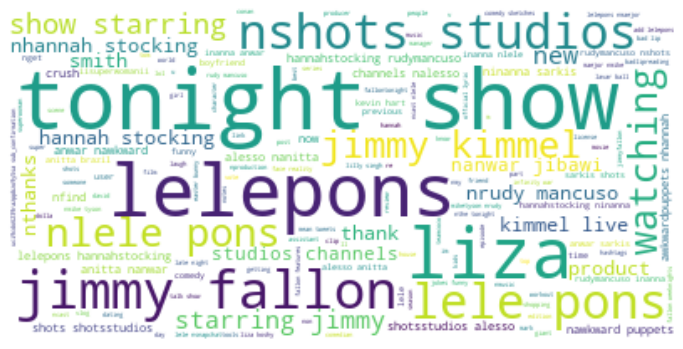


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Science & Technology para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Science & Technology'

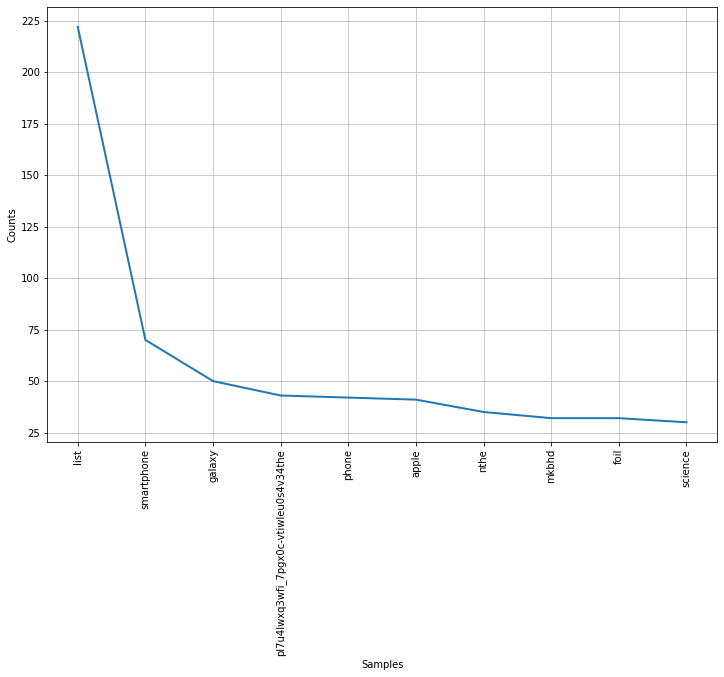

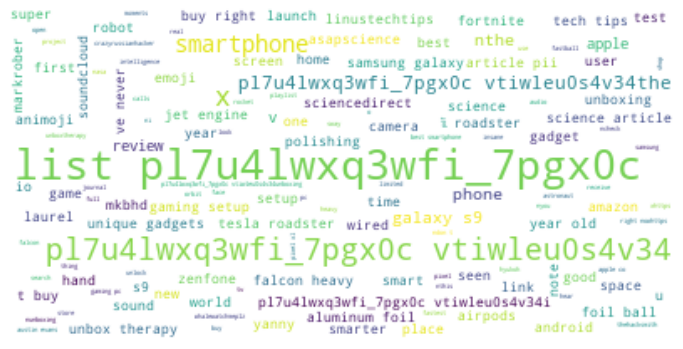


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Film & Animation para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Film & Animation'

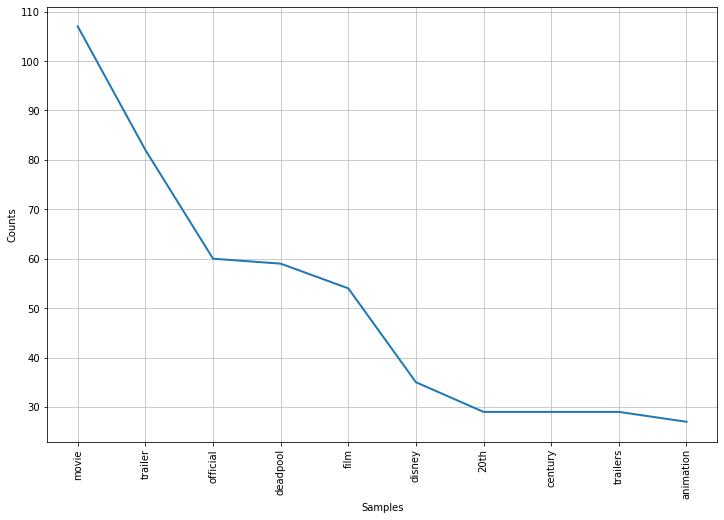

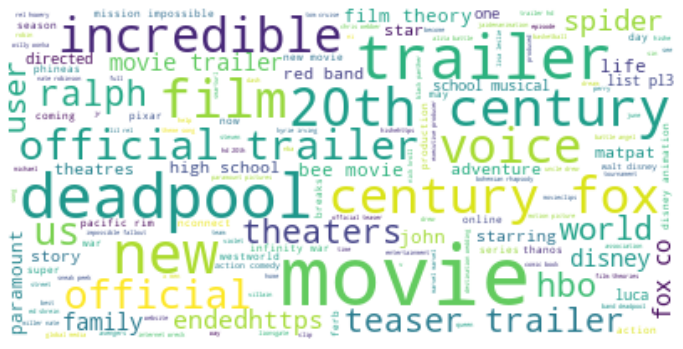


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en News & Politics para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'News & Politics'

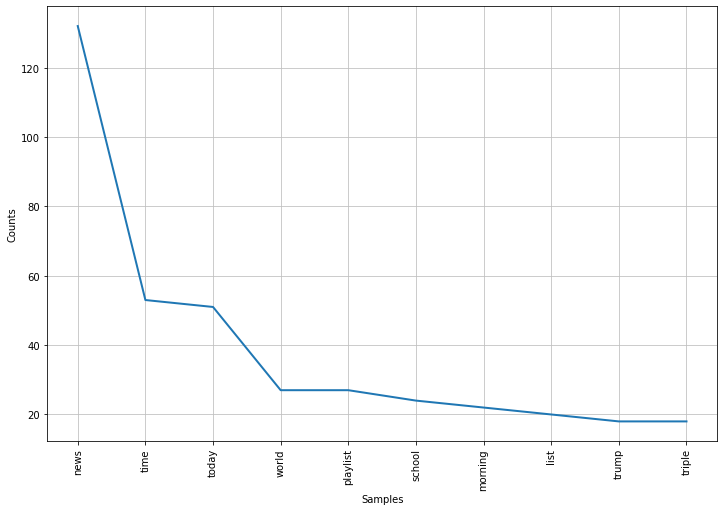

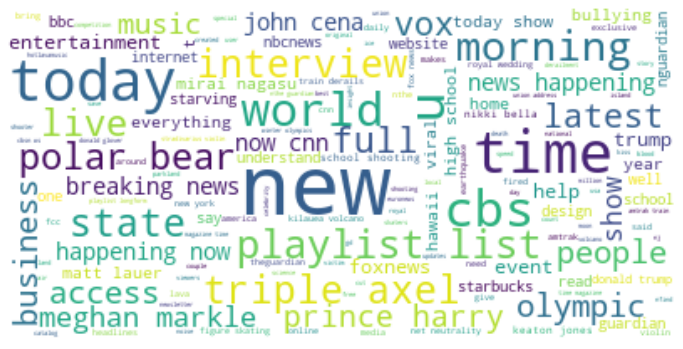


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Sports para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Sports'

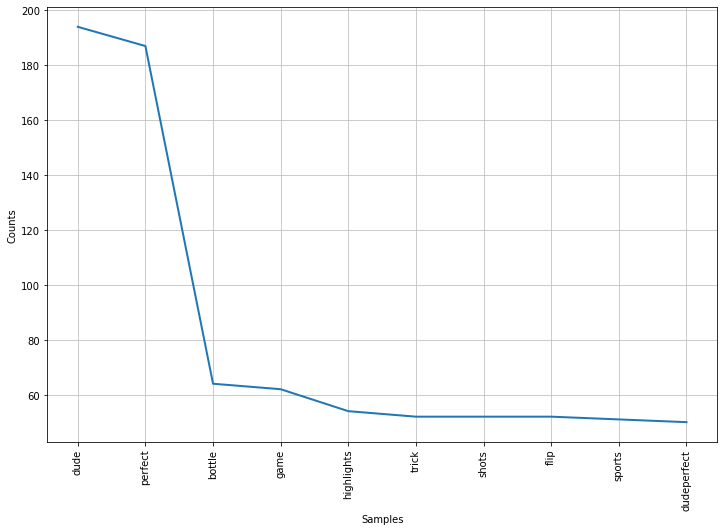

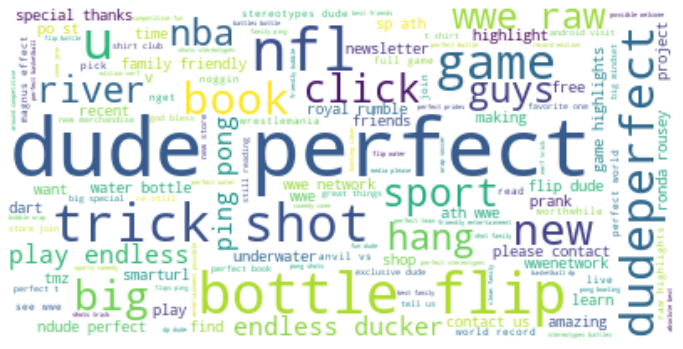


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Music para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Music'

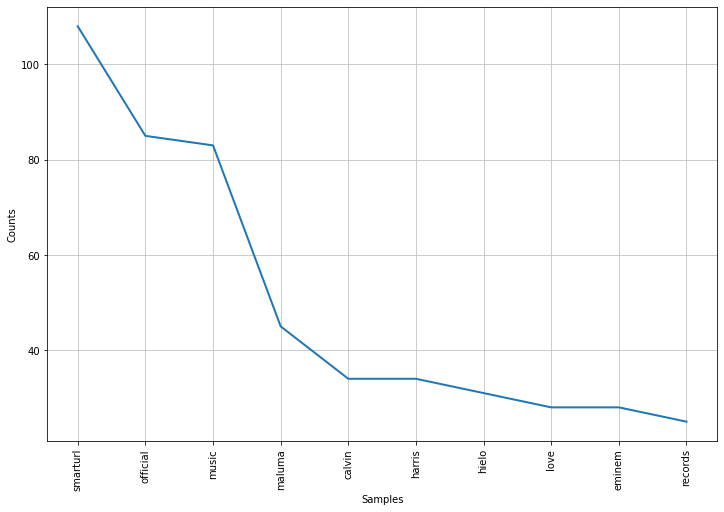

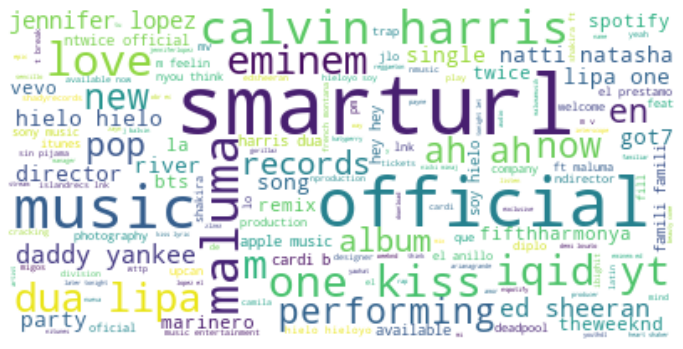


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Pets & Animals para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Pets & Animals'

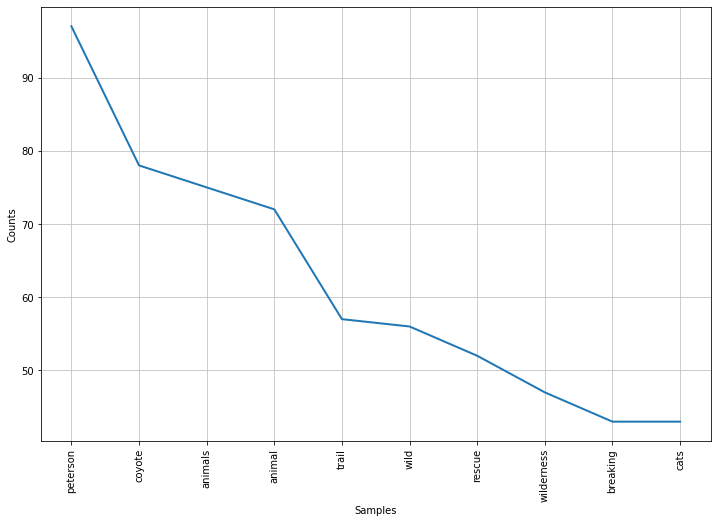

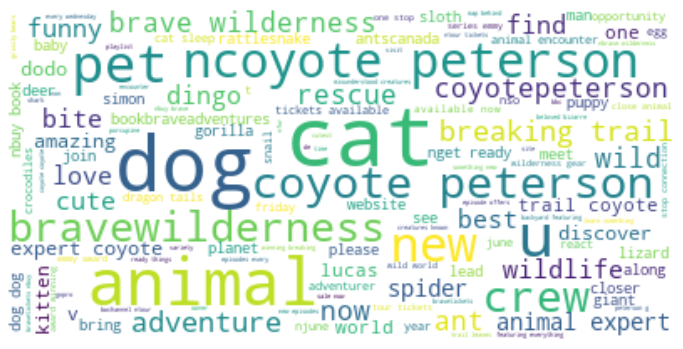


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Education para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Education'

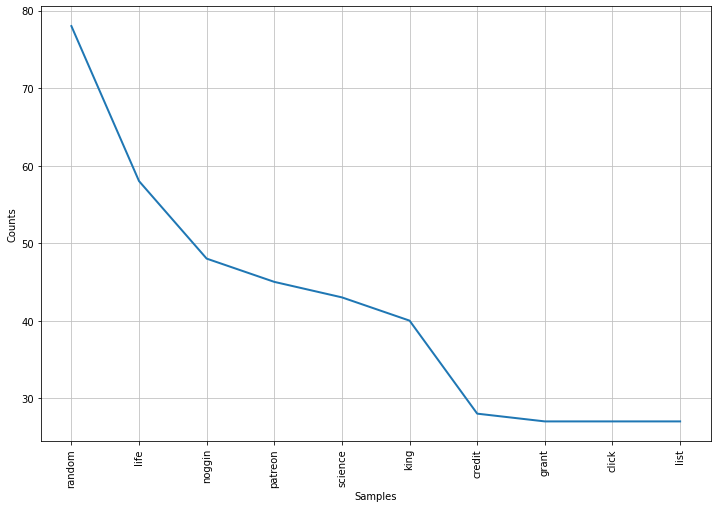

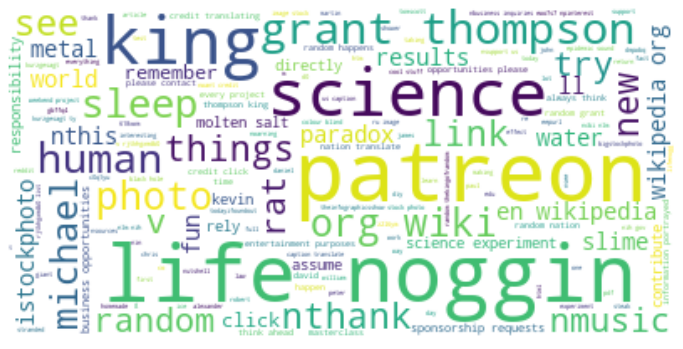


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Howto & Style para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Howto & Style'

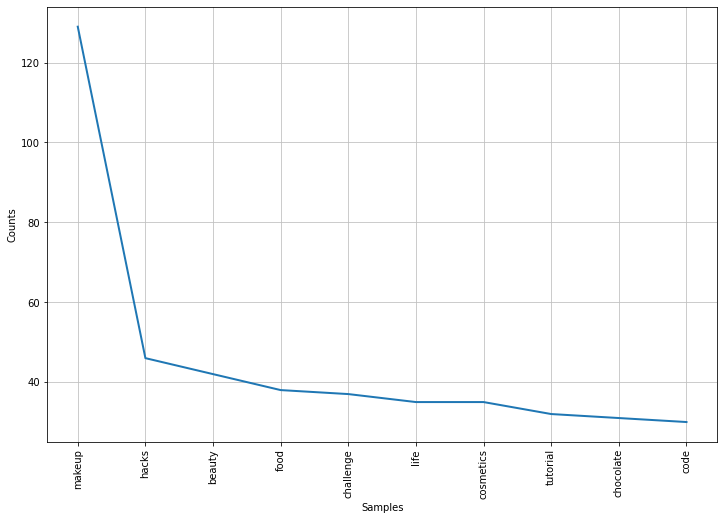

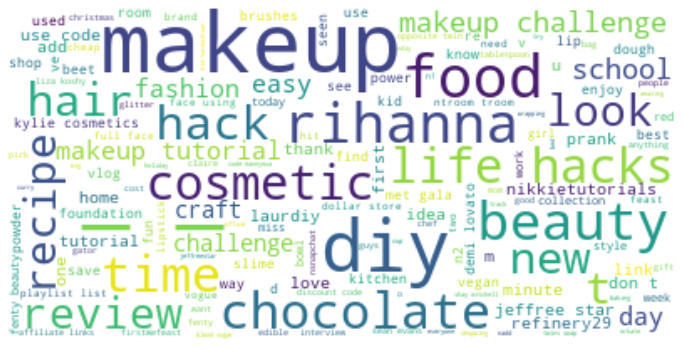


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Autos & Vehicles para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Autos & Vehicles'

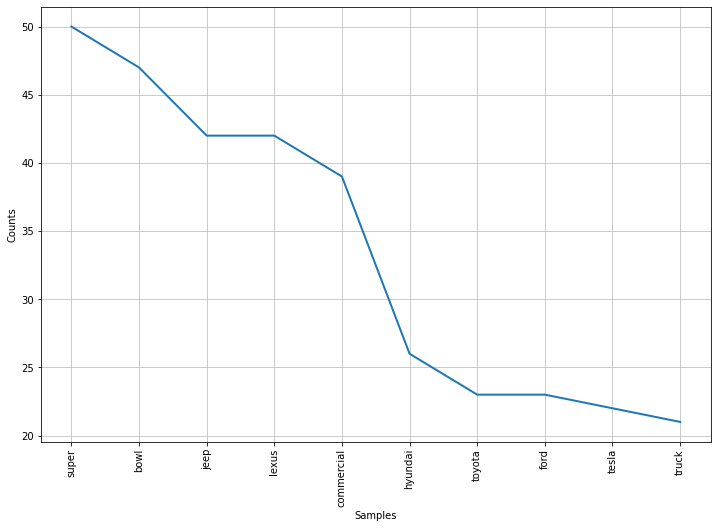

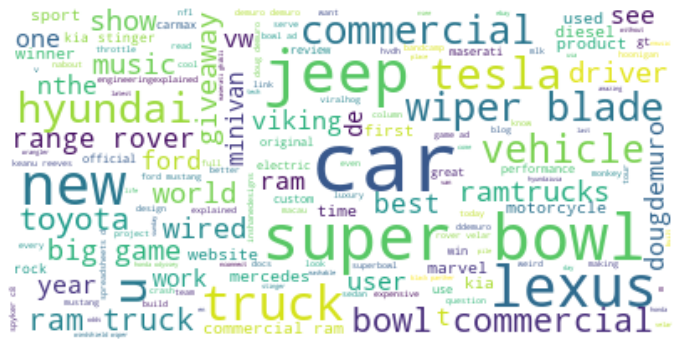


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Travel & Events para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Travel & Events'

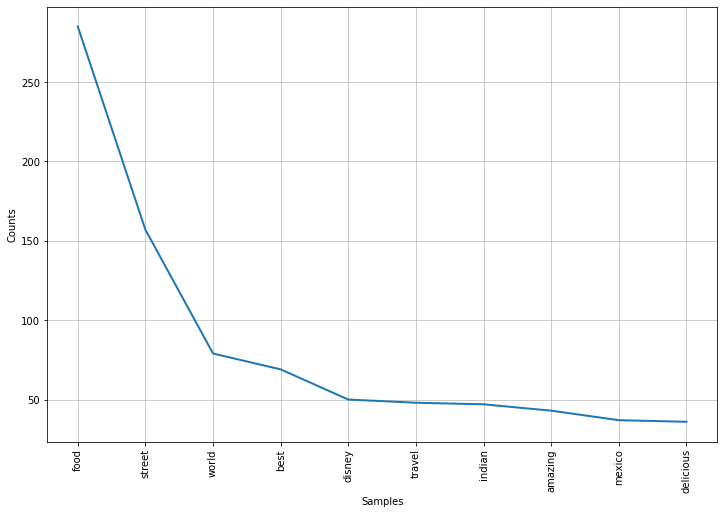

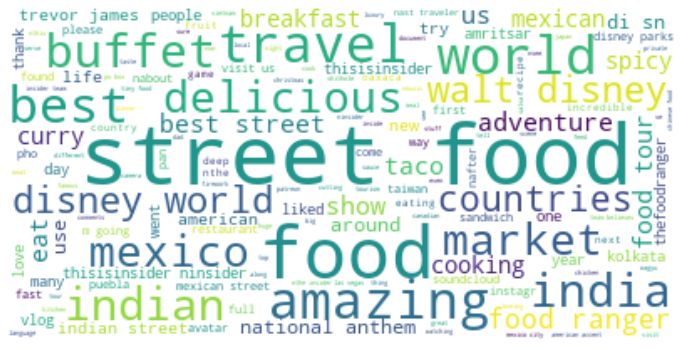


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Gaming para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Gaming'

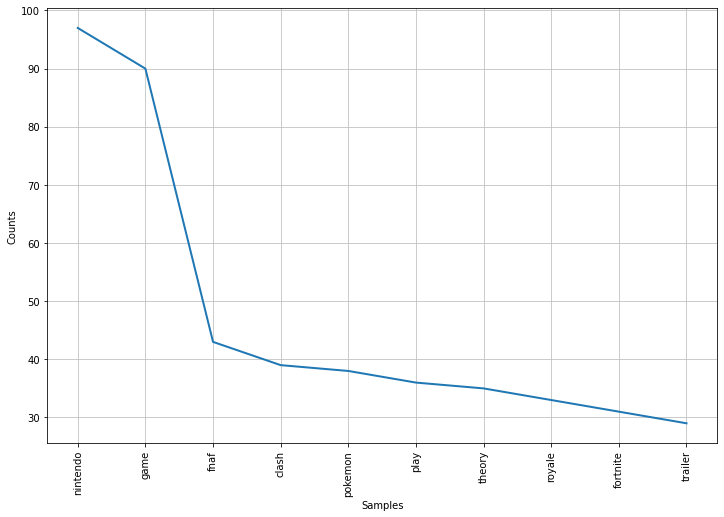

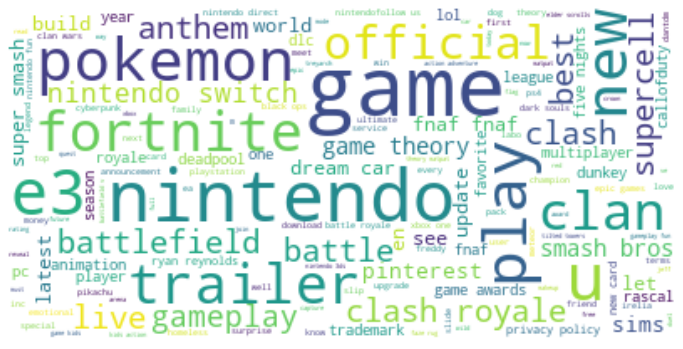


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Nonprofits & Activism para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Nonprofits & Activism'

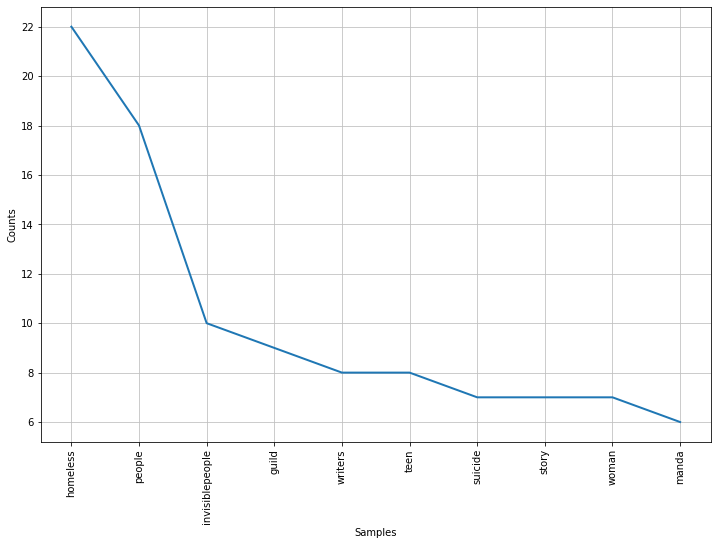

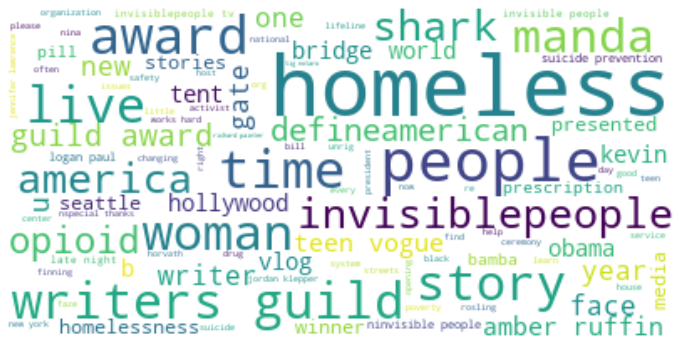


        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en Shows para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    


'Shows'

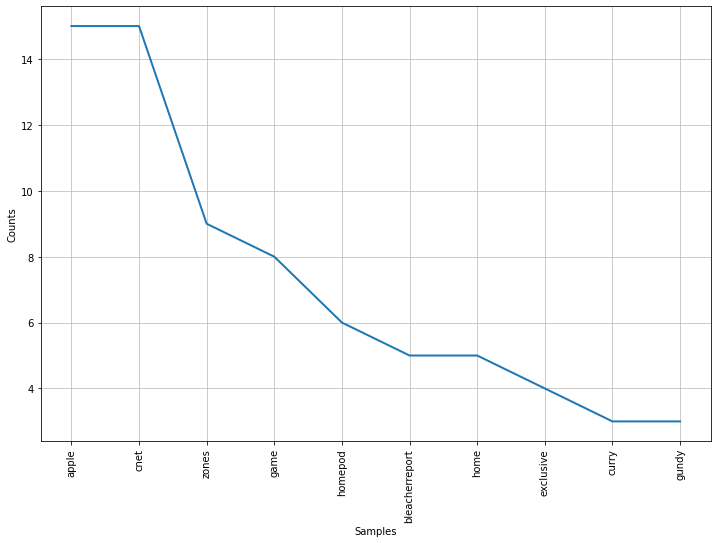

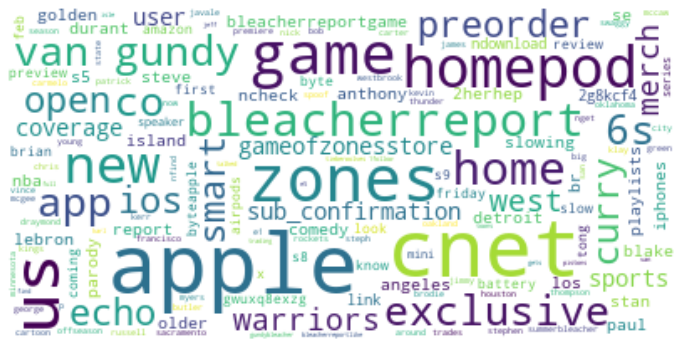

In [183]:
for category in categories:
    df_top_for_category = df1[df1['category_name'] == category].groupby('video_id', as_index=False)\
        [['description', 'video_title', 'tags', 'views']].max().sort_values(by='views', ascending=False)[:50]
    description = df_top_for_category['description'].values
    video_title = df_top_for_category['video_title'].values
    tags = df_top_for_category['tags'].values

    text = description + video_title + tags
    
    try:
        text = ' '.join(text)
    except Exception:
        text = ' '
    
    tokenlist = nltk.word_tokenize(text, 'english')
    fdist = nltk.FreqDist([word for word in tokenlist if len(word) > 3 if word not in stopwords])
    most_common = fdist.most_common(10)
    print(f"""
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
        10 palabras más frecuentes en {category} para los 50 videos mas vistos
        ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
    """)
    display(category)
    fdist.plot(10)
    generate_wordcloud(text, stopwords)

### 4. ¿La temporada o fecha en el que el video es publicado tiene alguna influencia? 

In [184]:
df = pd.read_csv('../data/preprocessed/video_cln.csv')
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['category_name']= df['category_name'].astype('category')

In [185]:
df_trending = pd.DataFrame()
df_trending['video_id'] = df['video_id']
df_trending['published_date'] = df['publish_time']
df_trending['trending_date'] = df['trending_date']
df_trending['views'] = df['views']

In [186]:
total_day_trending = df_trending.groupby('video_id', as_index=False)['trending_date'].count()
total_day_trending.rename({'trending_date':'total_trending_days'}, axis=1, inplace=True)


In [187]:
df_trending = pd.merge(df_trending, total_day_trending, how='left', on='video_id')


In [188]:
df_trending[df_trending['video_id'] == '2kyS6SvSYSE']

video_id      published_date trending_date    views  \
0     2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-14   748374   
217   2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-15  2188590   
448   2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-16  2325233   
689   2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-17  2400741   
924   2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-18  2468267   
1159  2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-19  2524854   
1383  2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-20  2564903   

      total_trending_days  
0                       7  
217                     7  
448                     7  
689                     7  
924                     7  
1159                    7  
1383                    7

In [189]:
df_trending_max = df_trending.drop_duplicates(subset=['video_id'], keep='last')
df_trending_max['publish_year'] = df_trending_max['published_date'].dt.year
df_trending_max['publish_month'] = df_trending_max['published_date'].dt.month_name()
df_trending_max['publish_day'] = df_trending_max['published_date'].dt.day
df_trending_max.groupby('publish_year')['views'].count()

publish_year
2006       1
2008       3
2009       5
2010       6
2011       8
2012       8
2013      13
2014       7
2015      10
2016       9
2017    2153
2018    4128
Name: views, dtype: int64

In [190]:
def plot_per_month(df, year, month=None):
    df_temp = df[df['publish_year'] == year]
    if month:
        df_temp = df_temp[df['publish_month'] == month]
        fig = px.bar(data_frame=df_temp, 
        x='publish_day' ,y='total_trending_days', title='Trending days per Month in {}/{}'.format(month, year))
        display("La mediana de dias en tendencia en {} es {}".format(month, np.median(df_temp['total_trending_days'])))
        fig.show()
        fig2 = px.bar(data_frame=df_temp, 
        x='publish_day', y='views', title='Views per day in {}/{}'.format(month, year))
        display("La mediana de views en {} es {}".format(month, np.median(df_temp['views'])))
        fig2.show()
        return 'Done!'
    fig = px.bar(df_temp, 'publish_month', 'views', title='Views per Month in {}'.format(year))
    fig.show()
    fig2 = px.bar(df_temp, 'publish_month', 'total_trending_days', title='Total trending days per month in {}'.format(year))
    fig2.show()

In [191]:
plot_per_month(df_trending_max, 2018)

In [192]:
plot_per_month(df_trending_max, 2018, 'May')

'La mediana de dias en tendencia en May es 12.0'

'La mediana de views en May es 1562000.0'

'Done!'

Nota: Se toma en cuenta el año `2018` debido a que corresponde al año con mayor cantidad de registros

### Conclusiones:
* Para el año 2018 `May` fue un año idoneo para publicar videos, ya que en este mes se concentro la mayor cantidad de videos que lograron ser tedencias:
 * Obtuvieron una mediana de 12 dias siendo tendencia
 * Obtuvieron una mediana de 1.5 millones de visualizaciones durante el mes
* En general a excepcion de `June` durante el 2018 todos los videos que conforman el dataset analizado lograron conseguir ser tendencia en por lo menos **2 dias** acumulando mas de **5000 videos** publicados como minimo en los otros meses

### 5. ¿Es posible predecir cuantos likes o visitas tendrá un video? Si es así, crea un modelo que lo compruebe.

In [193]:
print(df.shape)
df.head(1)

(40949, 13)


video_id trending_date  category_id        publish_time   views  likes  \
0  2kyS6SvSYSE    2017-11-14           22 2017-11-13 17:13:01  748374  57527   

   dislikes  comment_count   category_name             tags  \
0      2966          15954  People & Blogs  shantell martin   

                          video_title channel_title  \
0  we want to talk about our marriage  caseyneistat   

                                         description  
0  shantell s channel https www youtube com shant...

Generaremos un nuevo `DataFrame` que contenga información de valor para alimentar nuestro modelo, algunas columnas que contendrá son:
* total_trending_days
* likes
* category_id
* dislikes
* total_views
* published_minute
* published_hour
* published_day
* published_week
* published_month
* published_year

In [194]:
print(df_trending.shape)
df_trending.head(1)

(40949, 5)


video_id      published_date trending_date   views  total_trending_days
0  2kyS6SvSYSE 2017-11-13 17:13:01    2017-11-14  748374                    7

In [195]:
df2 = pd.merge(df, df_trending_max[['video_id', 'total_trending_days']], how='right',
                on='video_id')
df2.shape

(40949, 14)

Comprobamos el resultado del `merge` sobre los dos `DataFrame`

In [196]:
df2[df2['video_id'] == '-0CMnp02rNY']
#df2.head(1)

video_id trending_date  category_id        publish_time   views  \
37902  -0CMnp02rNY    2018-06-06           24 2018-06-04 13:00:00  475965   
37903  -0CMnp02rNY    2018-06-07           24 2018-06-04 13:00:00  605506   
37904  -0CMnp02rNY    2018-06-08           24 2018-06-04 13:00:00  705986   
37905  -0CMnp02rNY    2018-06-09           24 2018-06-04 13:00:00  754273   
37906  -0CMnp02rNY    2018-06-10           24 2018-06-04 13:00:00  792613   
37907  -0CMnp02rNY    2018-06-11           24 2018-06-04 13:00:00  800359   

       likes  dislikes  comment_count  category_name  \
37902   6531       172            271  Entertainment   
37903   7848       232            354  Entertainment   
37904   8930       277            371  Entertainment   
37905   9395       303            383  Entertainment   
37906   9720       330            413  Entertainment   
37907   9773       332            423  Entertainment   

                                                    tags  \
37902  ellen ellen degeneres the ellen show ellentube...   
37903  ellen ellen degeneres the ellen show ellentube...   
37904  ellen ellen degeneres the ellen show ellentube...   
37905  ellen ellen degeneres the ellen show ellentube...   
37906  ellen ellen degeneres the ellen show ellentube...   
37907  ellen ellen degeneres the ellen show ellentube...   

                                             video_title channel_title  \
37902  mindy kaling s daughter had the perfect reacti...  theellenshow   
37903  mindy kaling s daughter had the perfect reacti...  theellenshow   
37904  mindy kaling s daughter had the perfect reacti...  theellenshow   
37905  mindy kaling s daughter had the perfect reacti...  theellenshow   
37906  mindy kaling s daughter had the perfect reacti...  theellenshow   
37907  mindy kaling s daughter had the perfect reacti...  theellenshow   

                                             description  total_trending_days  
37902  ocean s 8 star mindy kaling dished on bringing...                    6  
37903  ocean s 8 star mindy kaling dished on bringing...                    6  
37904  ocean s 8 star mindy kaling dished on bringing...                    6  
37905  ocean s 8 star mindy kaling dished on bringing...                    6  
37906  ocean s 8 star mindy kaling dished on bringing...                    6  
37907  ocean s 8 star mindy kaling dished on bringing...                    6

In [197]:
drop_columns_no_numericals = ['tags', 'video_title', 'channel_title',
       'description']

In [198]:
df2.drop(drop_columns_no_numericals, axis=1, inplace=True)

In [199]:
df2['published_year'] = df2['publish_time'].dt.year
df2['published_month'] = df2['publish_time'].dt.month
df2['published_week'] = df2['publish_time'].dt.week
df2['published_day'] = df2['publish_time'].dt.day
df2['published_hour'] = df2['publish_time'].dt.hour
df2['published_minute'] = df2['publish_time'].dt.minute
df2.head(2)


video_id trending_date  category_id        publish_time   views  likes  \
0  9wRQljFNDW8    2017-11-14           17 2017-11-13 02:05:26   81377    655   
1  Om_zGhJLZ5U    2017-11-14            1 2017-11-12 18:00:03  288922   7515   

   dislikes  comment_count     category_name  total_trending_days  \
0        25            177            Sports                    1   
1       792           2111  Film & Animation                    1   

   published_year  published_month  published_week  published_day  \
0            2017               11              46             13   
1            2017               11              45             12   

   published_hour  published_minute  
0               2                 5  
1              18                 0

Eliminamos las columnas tipo `datetime` que ya fueron desempaquetadas

In [200]:
df2.drop(['trending_date', 'publish_time', 'video_id'], axis=1, inplace=True)
df2.sample(3)

category_id   views  likes  dislikes  comment_count    category_name  \
26783           25  729882   4477       374            967  News & Politics   
7986            10   38629   5618         4            409            Music   
36801           24  320204   4218       452              0    Entertainment   

       total_trending_days  published_year  published_month  published_week  \
26783                    9            2018                3              12   
7986                     6            2017               12              51   
36801                   10            2018                5              19   

       published_day  published_hour  published_minute  
26783             23              15                 0  
7986              20              23                53  
36801             11              11                 0

### Datos adicionales:

Agrupacion por cantidad de dias de un video siendo tendencia

In [201]:
df_trending_max.head(2)

video_id      published_date trending_date   views  \
10  9wRQljFNDW8 2017-11-13 02:05:26    2017-11-14   81377   
36  Om_zGhJLZ5U 2017-11-12 18:00:03    2017-11-14  288922   

    total_trending_days  publish_year publish_month  publish_day  
10                    1          2017      November           13  
36                    1          2017      November           12

In [202]:
total_d_trend_group = df_trending_max['total_trending_days'].to_frame()
total_d_trend_group.describe()

total_trending_days
count            6351.0000
mean                6.4476
std                 4.6428
min                 1.0000
25%                 3.0000
50%                 6.0000
75%                 8.0000
max                30.0000

In [203]:
df_tdtg = pd.cut(total_d_trend_group['total_trending_days'], bins= [0, 4, 15, 30])
df_tdtg = df_tdtg.value_counts().rename_axis('trending_days_grouped').reset_index(name = 'Count')

In [204]:
df_tdtg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   trending_days_grouped  3 non-null      category
 1   Count                  3 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 311.0 bytes


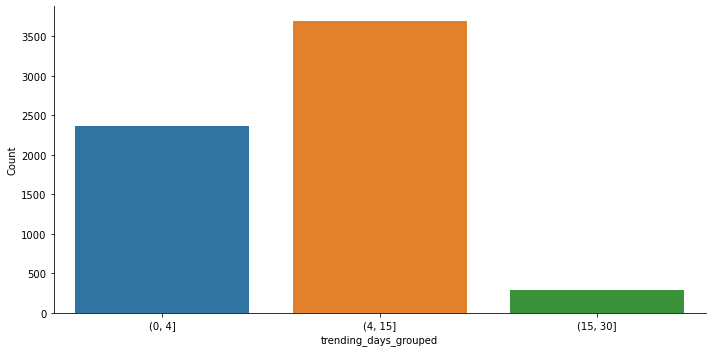

In [205]:
sns.catplot( y='Count',x='trending_days_grouped',\
            data=df_tdtg, kind='bar', aspect = 2)

Momento de exportar nuestro nuevo `Dataset` para crear nuestro modelo

In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category_id          40949 non-null  int64   
 1   views                40949 non-null  int64   
 2   likes                40949 non-null  int64   
 3   dislikes             40949 non-null  int64   
 4   comment_count        40949 non-null  int64   
 5   category_name        40949 non-null  category
 6   total_trending_days  40949 non-null  int64   
 7   published_year       40949 non-null  int64   
 8   published_month      40949 non-null  int64   
 9   published_week       40949 non-null  int64   
 10  published_day        40949 non-null  int64   
 11  published_hour       40949 non-null  int64   
 12  published_minute     40949 non-null  int64   
dtypes: category(1), int64(12)
memory usage: 4.1 MB


In [208]:
df2.shape

(40949, 13)

In [207]:
df2.to_csv('../data/model_data/youtube_num.csv', index=False)